In [9]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from Utils import paths
from Utils import transformation_utils as t_utils

importlib.reload(paths)
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [10]:
fhr = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/fhr.pickle")
y = pd.read_pickle(f"{paths.CLEAN_CUT_DATA_PATH}/y.pickle")

fhr.shape, y.shape

((538, 9600), (538,))

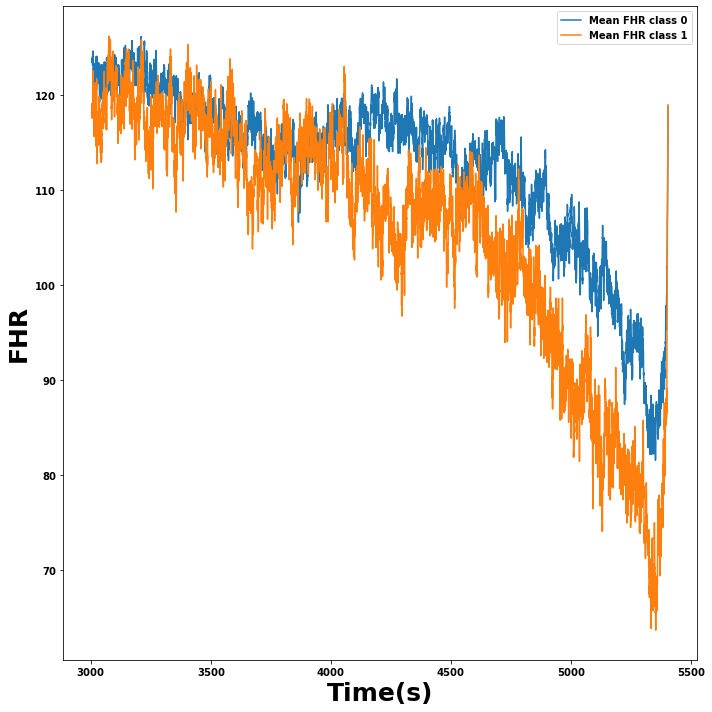

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax.plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')

ax.set_xlabel('Time(s)', fontsize=25)
ax.set_ylabel('FHR', fontsize=25)
ax.legend()
fig.tight_layout()

In [12]:
fft_data = dict()
freqs = t_utils.get_freqs(fhr.shape[-1])

for idx_fhr, fhr_row in tqdm(fhr.copy().iterrows(), total=len(fhr)):
    fhr_signal = fhr_row.values

    fft_data[idx_fhr] = t_utils.nan_save_fft(fhr_signal, freqs)

  0%|          | 0/538 [00:00<?, ?it/s]

In [30]:
fft_df = pd.DataFrame(fft_data).T
fft_df.columns = freqs
fft_df = fft_df.loc[:, freqs <= 0.1]
fft_df = fft_df.iloc[:, 1:]
fft_df

,0.000417,0.000833,0.001250,0.001667,0.002083,0.002500,0.002917,0.003333,0.003750,0.004167,...,0.096250,0.096667,0.097083,0.097500,0.097917,0.098333,0.098750,0.099167,0.099583,0.100000
1001,102171.598653,110348.258973,72541.811610,28100.482622,62801.362569,36225.243524,11489.906293,52202.861610,22283.073367,29340.236071,...,5018.349530,920.143385,18805.264273,12044.355194,1339.217191,8504.619291,10062.072042,9544.845733,12619.316890,8987.307247
1002,143974.596550,83431.459018,108190.692305,11091.429733,137085.043107,55410.377435,68583.465745,60078.305167,37548.548955,13889.043022,...,10366.378373,19264.062428,4713.090935,10504.688420,7061.203467,12764.273153,16372.094989,7494.419788,10196.845038,13271.503093
1003,100335.581788,89616.039135,57038.106946,31051.512565,15898.191762,7515.140099,14653.803766,31209.547412,12306.924524,19270.186586,...,2716.524224,3351.104142,3630.793889,4510.034554,4931.711257,5400.877192,4732.643042,4235.964107,4979.067917,5002.273665
1004,55028.499099,81581.837216,33356.501105,37049.370390,14006.450982,17923.306236,19121.386669,11172.334674,14466.439041,7907.098262,...,1868.497582,2412.253855,2878.516826,2773.077542,831.543569,3131.697012,2312.963715,1804.635003,1402.485985,768.413174
1005,93466.075230,42310.768230,44186.379519,29973.736052,45554.933617,71031.786202,97750.606158,34505.418184,37679.150461,54175.118881,...,1742.166401,5921.433888,8428.497996,3602.388162,2519.861686,2821.691634,6560.850268,7382.035117,10566.037222,1516.081413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,14306.242786,14494.763826,11641.218539,2653.770834,3729.177996,5799.915558,15421.226248,14233.683497,8367.741839,6682.685726,...,1652.231262,1689.108004,2185.186964,1660.509047,3210.321874,1965.862900,1481.014521,3418.247106,3521.881842,1993.508518
2043,42136.620085,105088.490026,44879.098892,41807.632589,42204.598084,18345.458925,66683.166698,71140.187350,19831.586924,36112.488071,...,11801.508049,7986.466794,9706.120677,429.836443,3425.770544,3493.118334,5036.138979,6847.427389,4377.299056,6019.385417
2044,17500.725343,33162.380840,17801.980438,5027.363123,10768.031399,7498.420380,9880.789328,3944.030513,13041.084474,8482.742466,...,2983.347412,1761.322508,1314.414345,474.653334,3836.756488,1534.589885,1573.170819,502.950662,2205.540238,2415.486730
2045,110750.291430,73692.849039,49613.837805,26100.279368,26224.914952,16074.654770,14525.535067,13231.820779,20698.978996,18098.714162,...,3218.750504,3299.818901,981.143203,2622.783577,2026.467126,1647.061275,1568.200304,2860.366603,1399.311258,1314.233548


In [33]:
tt = np.array(freqs)[freqs <= 0.1][1:]

fft_0 = fft_df.copy()[y == 0]
mean_0 = fft_0.mean().values
std_0 = fft_0.std().values
max_0 = fft_0.max().values
min_0 = fft_0.min().values

fft_1 = fft_df.copy()[y == 1]
mean_1 = fft_1.mean().values
std_1 = fft_1.std().values
max_1 = fft_1.max().values
min_1 = fft_1.min().values

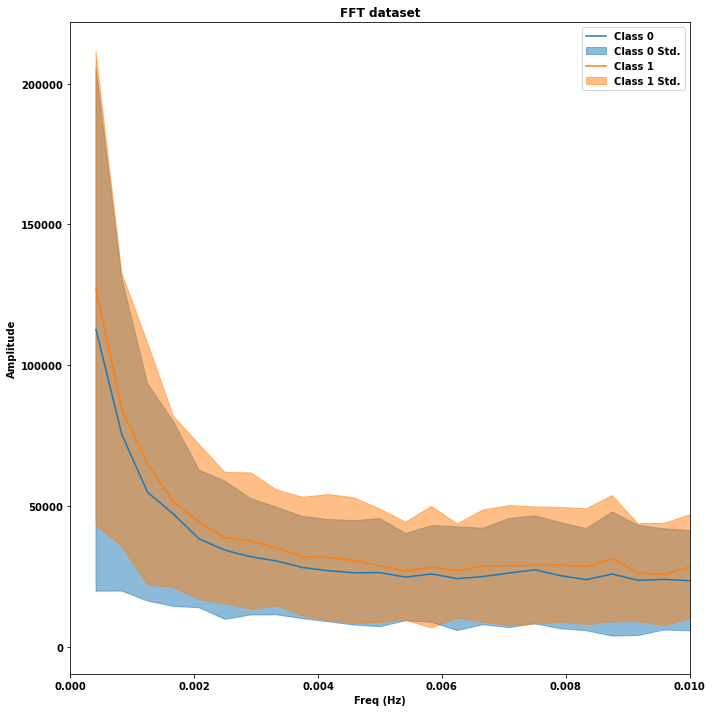

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"FFT dataset")
ax.set_ylabel(f"Amplitude")
ax.set_xlabel("Freq (Hz)")
ax.set_xlim((0,0.01))
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot.pdf")

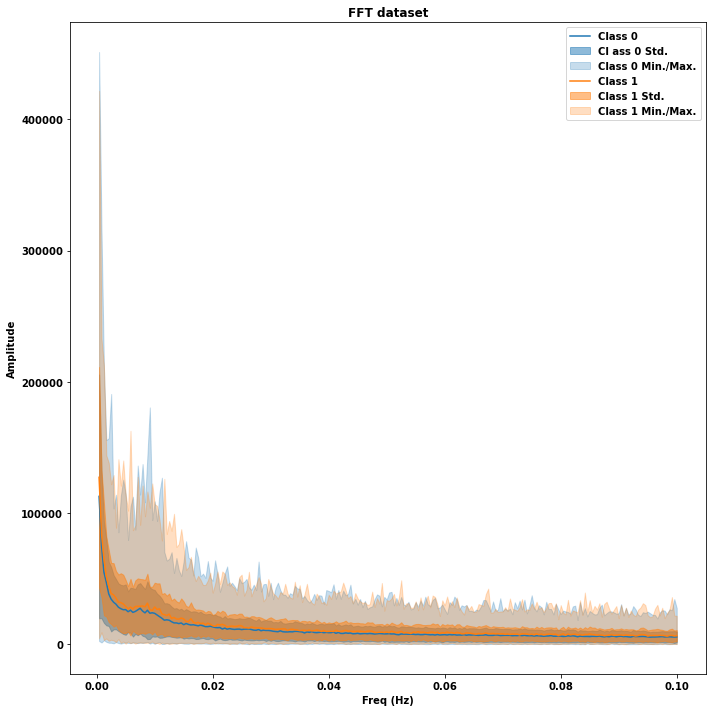

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt, mean_0 - std_0, mean_0 + std_0, label='Cl ass 0 Std.', alpha=0.5, color=COLORS[0])
ax.fill_between(tt, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax.plot(tt, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax.fill_between(tt, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"FFT dataset")
ax.set_ylabel(f"Amplitude")
ax.set_xlabel("Freq (Hz)")
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot_Mm.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Desc_plot_Mm.pdf")

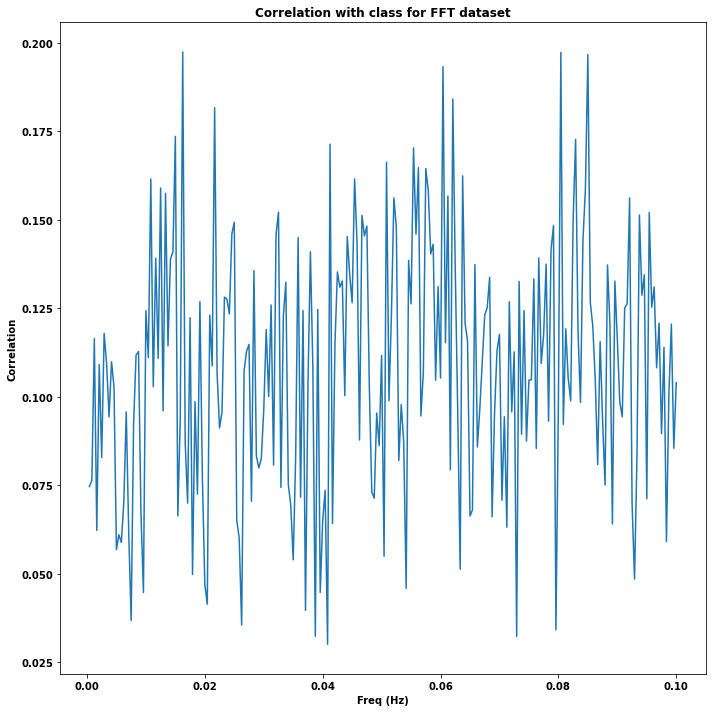

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

fft_df.corrwith(y).plot(ax=ax)

ax.set_ylabel('Correlation')
ax.set_xlabel('Freq (Hz)')
ax.set_title(f'Correlation with class for FFT dataset')
fig.tight_layout()

plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_correlation.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_correlation.pdf")

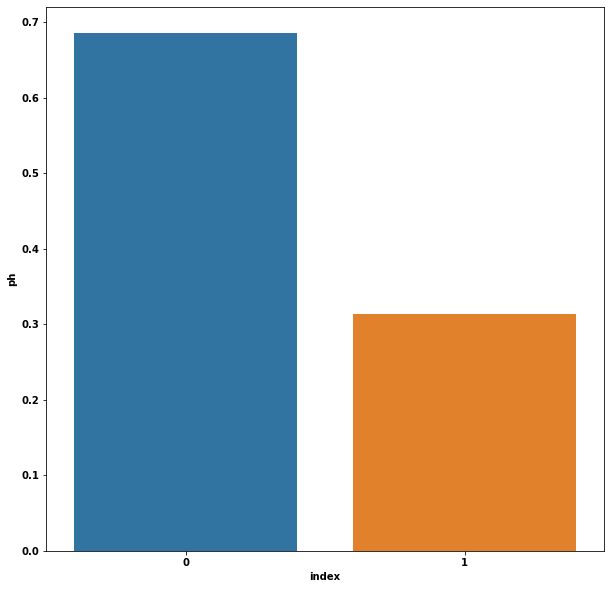

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='index', y='ph', data=pd.DataFrame(y.value_counts(normalize=True)).reset_index())
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_Distribution.png")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/Class_Distribution.pdf")

In [38]:
fft_df['patologico'] = y

In [39]:
fft_df.to_csv(f"{paths.FFT_DATA_PATH}/fft_dataset.csv")

In [40]:
X = fft_df.iloc[:, :-1]
X.to_pickle(f"{paths.FFT_DATA_PATH}/X.pickle")
y.to_pickle(f"{paths.FFT_DATA_PATH}/y.pickle")
